# **Biomarker Selection for CLL and T2D**

This notebook performs feature selection to identify significant biomarkers for Chronic Lymphocytic Leukemia (CLL) and Type 2 Diabetes (T2D) using a merged gene expression dataset. Three feature selection methods—Lasso, Random Forest, and SVM-RFE—are applied to rank and select biomarkers. The intersection of selected features is identified, and a t-test is used to verify the statistical significance of the common biomarkers. The results are saved for further analysis.

### **1. Import Libraries**

The following libraries are imported for data manipulation, visualization, statistical testing, and machine learning-based feature selection.

In [44]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

### **2. Load Dataset**

The merged dataset containing gene expression data for CLL and T2D is loaded from a CSV file.

In [45]:
# Load the dataset
data = pd.read_csv('clean_data/merged_cll_t2d_data.csv')
data.head()

,SOCS1,CD3D,CCL4,IL7R,TSSC2,SAMSN1,PTPN7,CD300C,VSIG4,CXCL10,...,IFIT3,BATF3,SLFN12L,IL10,SIGLEC7,GZMH,CD7,OLR1,S100A8,label
0,4.0,24.0,0.0,49.0,21.0,94.0,12.0,0.0,0.0,217.0,...,1024.0,6.0,13.0,21.0,0.0,8.0,0.0,21.0,38.0,0.0
1,5.0,14.0,0.0,97.0,19.0,51.0,17.0,5.0,0.0,214.0,...,1958.0,20.0,15.0,23.0,0.0,6.0,2.0,52.0,53.0,1.0
2,7.0,8.0,0.0,46.0,27.0,43.0,13.0,12.0,44.0,134.0,...,1320.0,0.0,10.0,14.0,3.0,0.0,0.0,44.0,25.0,0.0
3,9.0,8.0,3.0,37.0,25.0,146.0,2.0,0.0,0.0,86.0,...,750.0,0.0,21.0,10.0,0.0,0.0,0.0,67.0,16.0,0.0
4,9.0,25.0,0.0,77.0,24.0,67.0,21.0,20.0,36.0,41.0,...,1125.0,15.0,14.0,75.0,0.0,0.0,0.0,68.0,35.0,1.0


### **3. Select Features and Target**

The dataset is split into features (X: gene expression values) and the target variable (y: labels indicating disease status).

In [46]:
# Select features and target variable (X, y)
X = data.drop(columns=['label'])
y = data['label']

### **4. Standardize Features**

Features are standardized using StandardScaler to ensure comparability, as many ML algorithms (e.g., SVM) are sensitive to feature scales.

In [47]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **5. Visualize Class Distribution**

A count plot visualizes the distribution of classes (e.g., healthy, T2D, CLL) in the dataset.

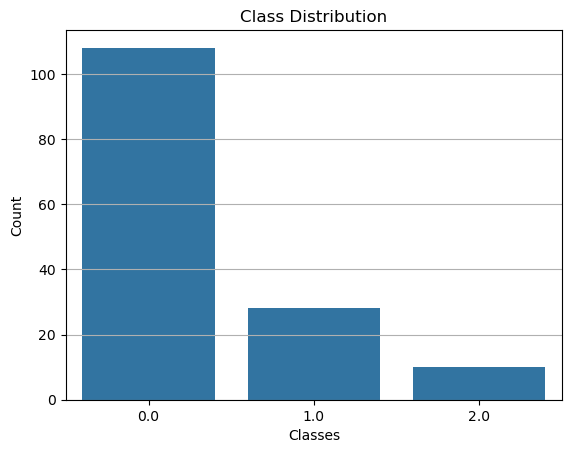

In [48]:
# Visualize the class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

### **6. Handle Class Imbalance (Commented Out)**

The code for handling class imbalance using SMOTE is present but commented out. It would upsample the minority class and visualize the new class distribution.

In [49]:
# # Handle class imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
# # print the shapesbefore and after SMOTE
# print(f"Original dataset shape: {X.shape}, {y.shape}")
# print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")
# # Visualize the class distribution after SMOTE
# sns.countplot(x=y_resampled)
# plt.title('Class Distribution After SMOTE')
# plt.xlabel('Classes')
# plt.ylabel('Count')
# plt.grid(True, axis='y')
# plt.show()

### **7. Lasso Feature Selection**

A Lasso model is trained to select features by shrinking less important feature coefficients to zero. The absolute values of the coefficients are used to rank features.

In [50]:
# Train Lasso model and perform feature selection s
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
importance = np.abs(lasso.coef_)
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
lasso_feature_importance = feature_importance[feature_importance['Importance'] > 0]
# Print the selected features
print("Number of Biomarkers selected by Lasso:", len(lasso_feature_importance))
print("Selected Biomarkers using Lasso:")
print(lasso_feature_importance)

Number of Biomarkers selected by Lasso: 58
Selected Biomarkers using Lasso:
     Feature    Importance
0      CXCR6  1.135029e-02
1    IL18RAP  8.466365e-03
2     CCL4L2  6.089705e-03
3    SLFN12L  4.990377e-03
4       IL10  4.513586e-03
5     CD300C  4.356053e-03
6        CD7  3.884721e-03
7    SIGLEC7  3.389747e-03
8      GPR84  3.243850e-03
9       CD3G  2.654381e-03
10      GZMH  2.481683e-03
11     KLRC1  2.291277e-03
12     P2RY6  2.281231e-03
13      AQP9  2.089039e-03
14      NKG7  1.778209e-03
15     BATF3  1.718469e-03
16      CD3D  1.683715e-03
17    CLEC5A  1.601301e-03
18      PRF1  1.432744e-03
19    CD300E  1.377268e-03
20  PDCD1LG2  1.181293e-03
21      PPBP  1.071004e-03
22     VSIG4  9.632382e-04
23       ITK  9.609635e-04
24    LRRC25  8.948021e-04
25      FPR1  8.711861e-04
26      FLT4  8.285573e-04
27      OLR1  8.278472e-04
28    SEMA6B  7.384200e-04
29      GZMA  6.224315e-04
30      CCL7  5.568363e-04
31     SOCS1  5.257848e-04
32      CCL4  5.079180e-04
33    

/home/iot/anaconda3/envs/sajid/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.877e+00, tolerance: 5.222e-03
  model = cd_fast.enet_coordinate_descent(


### **8. Random Forest Feature Selection**

A Random Forest model is trained to select features based on their importance scores, derived from their contribution to classification.

In [51]:
# Train Random Forest model and perform feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importance = rf.feature_importances_
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
rf_feature_importance = feature_importance[feature_importance['Importance'] > 0]
# Print the selected features
print("Number of Biomarkers selected by Random Forest:", len(rf_feature_importance))
print("Selected Biomarkers using Random Forest:")
print(rf_feature_importance)

Number of Biomarkers selected by Random Forest: 59
Selected Biomarkers using Random Forest:
     Feature  Importance
0      IL2RB    0.041520
1       IL1B    0.040958
2      FSIP1    0.040559
3       PRF1    0.036514
4      SOCS1    0.033727
5      PTPN7    0.032795
6      CYTIP    0.030120
7        CD7    0.029650
8       GZMB    0.025587
9       APOD    0.025045
10      IL7R    0.024887
11      CCL5    0.021826
12      CD3G    0.020719
13    SAMSN1    0.020162
14      CCL3    0.018836
15      IDO1    0.018323
16     IFIT3    0.018068
17    GIMAP6    0.018065
18      CD3D    0.017967
19      OLR1    0.017902
20     CD209    0.017604
21      NKG7    0.016907
22   SLFN12L    0.016830
23     IL2RA    0.016543
24      PPBP    0.016322
25    LRRC25    0.015787
26       ITK    0.015784
27    FCGR3A    0.015712
28      FLT4    0.015646
29  PDCD1LG2    0.015618
30    S100A8    0.014770
31      IL10    0.014558
32    CD300E    0.014533
33    CD300C    0.014526
34     TSSC2    0.014128
35      

### **9. SVM-RFE Feature Selection**

SVM-RFE is used to select the top 10 features by iteratively eliminating the least important features based on SVM weights.

In [52]:
# Train SVM-RFE model and perform feature selection
svm = SVC(kernel='linear', random_state=42)
rfe = RFE(estimator=svm, n_features_to_select=10)
rfe.fit(X, y)
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfe.ranking_})
# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
svmrfe_feature_importance = feature_importance[feature_importance['Importance'] > 0.0]
# Print the selected features
print("Number of Biomarkers selected by SVM-RFE:", len(svmrfe_feature_importance))
print("Selected Biomarkers using SVM-RFE:")
print(svmrfe_feature_importance)

Number of Biomarkers selected by SVM-RFE: 59
Selected Biomarkers using SVM-RFE:
     Feature  Importance
0      THBS1          50
1       MT1E          49
2       OLR1          48
3       MT1G          47
4       MT2A          46
5     CXCL10          45
6     S100A8          44
7      IFIT3          43
8       CCL7          42
9       IDO1          41
10    SAMSN1          40
11     PTPN7          39
12    GIMAP6          38
13       CD7          37
14      IL1B          36
15      IL10          35
16    FCER1G          34
17     TSSC2          33
18    LRRC25          32
19     IL2RB          31
20      FLT4          30
21      CCL3          29
22      APOD          28
23     SOCS1          27
24     P2RY6          26
25     BATF3          25
26  PDCD1LG2          24
27      CCL5          23
28    SEMA6B          22
29    CLEC5A          21
30      FPR1          20
31      IL7R          19
32      AQP9          18
33      CD3D          17
34     VSIG4          16
35    FCGR3A        

### **10. Intersection of Selected Features**

The common biomarkers selected by all three methods (Lasso, Random Forest, and SVM-RFE) are identified.

In [53]:
# Intersection of selected features from all three methods
lasso_features = set(lasso_feature_importance['Feature'])
rf_features = set(rf_feature_importance['Feature'])
svmrfe_features = set(svmrfe_feature_importance['Feature'])
intersection_features = lasso_features.intersection(rf_features).intersection(svmrfe_features)
# Print the intersection of selected features
print("Number of Biomarkers in intersection:", len(list(intersection_features)))
print("Intersection of Selected Biomarkers:")
print(intersection_features)

Number of Biomarkers in intersection: 58
Intersection of Selected Biomarkers:
{'IL18RAP', 'IDO1', 'FCGR3A', 'MT1G', 'CD300E', 'PDCD1LG2', 'LRRC25', 'FLT4', 'IL7R', 'THBS1', 'PTPN7', 'GPR84', 'MT1E', 'PRF1', 'CCL4L2', 'TSSC2', 'MT2A', 'IL2RB', 'CD7', 'CD3G', 'SIGLEC7', 'CXCL10', 'SEMA6B', 'ITK', 'BATF3', 'FSIP1', 'OLR1', 'GZMH', 'GZMB', 'IL2RA', 'IL1B', 'AQP9', 'IFIT3', 'SOCS1', 'NKG7', 'GIMAP6', 'LILRB4', 'S100A8', 'CD209', 'GZMA', 'CXCR6', 'CCL7', 'CYTIP', 'CD300C', 'CCL5', 'CLEC5A', 'CCL4', 'FPR1', 'P2RY6', 'KLRC1', 'SLFN12L', 'CCL3', 'FCER1G', 'CD3D', 'PPBP', 'APOD', 'VSIG4', 'IL10'}


### **11. Compile Selected Features with Scores**

A DataFrame is created to compile the importance scores from all three methods for the common biomarkers.



In [54]:
# Create a new DataFrame with the selected features with scores from all three methods
# Create a list to store rows
rows = []
for feature in intersection_features:
    lasso_score = lasso_feature_importance[lasso_feature_importance['Feature'] == feature]['Importance'].values[0]
    rf_score = rf_feature_importance[rf_feature_importance['Feature'] == feature]['Importance'].values[0]
    svmrfe_score = svmrfe_feature_importance[svmrfe_feature_importance['Feature'] == feature]['Importance'].values[0]
    rows.append({
        'Feature': feature,
        'Lasso': lasso_score,
        'Random Forest': rf_score,
        'SVM-RFE': svmrfe_score
    })

selected_features = pd.DataFrame(rows)
# Print the selected features with scores
print("Selected Biomarkers with Scores:")
print(selected_features)
# Save to CSV
selected_features.to_csv('results/cll_t2d_multimode_selected_features.csv', index=False)

Selected Biomarkers with Scores:
     Feature         Lasso  Random Forest  SVM-RFE
0    IL18RAP  8.466365e-03       0.013556        1
1       IDO1  3.646277e-04       0.018323       41
2     FCGR3A  1.213248e-04       0.015712       15
3       MT1G  5.901847e-06       0.007341       47
4     CD300E  1.377268e-03       0.014533       12
5   PDCD1LG2  1.181293e-03       0.015618       24
6     LRRC25  8.948021e-04       0.015787       32
7       FLT4  8.285573e-04       0.015646       30
8       IL7R  8.332262e-06       0.024887       19
9      THBS1  1.645783e-06       0.013162       50
10     PTPN7  2.021337e-04       0.032795       39
11     GPR84  3.243850e-03       0.010398        7
12      MT1E  1.400710e-05       0.006560       49
13      PRF1  1.432744e-03       0.036514        1
14    CCL4L2  6.089705e-03       0.005976        1
15     TSSC2  2.879782e-04       0.014128       33
16      MT2A  1.444042e-07       0.010742       46
17     IL2RB  1.615999e-04       0.041520       3

### **12. Verify Common Biomarkers with T-test**

A t-test is performed to verify the statistical significance of the common biomarkers by comparing their expression levels between healthy (label 0) and T2D (label 1) groups.

In [55]:
# Verify the common biomarkers with t-test
# Load the dataset again
data = pd.read_csv('clean_data/merged_cll_t2d_data.csv')
# Select features and target variable (X, y)
X = data.drop(columns=['label'])
y = data['label']
# Select the common biomarkers
common_biomarkers = list(intersection_features)
# Create a new DataFrame with the common biomarkers
common_biomarkers_df = data[common_biomarkers]
# Add the target variable
common_biomarkers_df['label'] = y
# Perform t-test for each common biomarker
t_test_results = []
for feature in common_biomarkers:
    group1 = common_biomarkers_df[common_biomarkers_df['label'] == 0][feature]
    group2 = common_biomarkers_df[common_biomarkers_df['label'] == 1][feature]
    t_stat, p_value = ttest_ind(group1, group2)
    t_test_results.append({
        'Feature': feature,
        't-statistic': t_stat,
        'p-value': p_value
    })
# Create a DataFrame for t-test results
t_test_results_df = pd.DataFrame(t_test_results)
# Print the t-test results
print("T-test Results:")
print(t_test_results_df)
# Save t-test results to CSV
t_test_results_df.to_csv('results/cll_t2d_multimode_t_test_results.csv', index=False)

T-test Results:
     Feature  t-statistic   p-value
0    IL18RAP     0.353283  0.724432
1       IDO1    -0.990667  0.323634
2     FCGR3A     0.666245  0.506400
3       MT1G    -2.054794  0.041842
4     CD300E    -0.320228  0.749294
5   PDCD1LG2     0.754316  0.451983
6     LRRC25     1.417743  0.158587
7       FLT4     0.987705  0.325077
8       IL7R    -0.109836  0.912704
9      THBS1    -0.760945  0.448027
10     PTPN7     1.128860  0.260974
11     GPR84    -0.819484  0.413965
12      MT1E    -1.950671  0.053183
13      PRF1     0.074879  0.940423
14    CCL4L2     1.828718  0.069665
15     TSSC2     1.718639  0.087990
16      MT2A    -2.017490  0.045642
17     IL2RB     0.454564  0.650158
18       CD7     0.407925  0.683980
19      CD3G    -0.038477  0.969365
20   SIGLEC7     1.075002  0.284306
21    CXCL10    -0.215904  0.829391
22    SEMA6B     1.983165  0.049393
23       ITK     1.072508  0.285420
24     BATF3    -0.245564  0.806396
25     FSIP1     1.720976  0.087563
26      OLR1

/tmp/ipykernel_77966/1546861982.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_biomarkers_df['label'] = y
